In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
df = pd.read_csv('data/Machine_Learning_Projects-main/Mail spam prediction/mail_data - mail_data.csv')
df 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
df.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


<AxesSubplot:xlabel='Category', ylabel='count'>

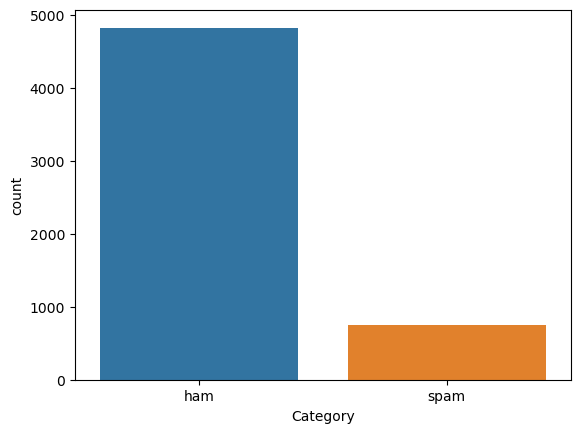

In [6]:
sns.countplot(x='Category', data=df)

In [7]:
A = df['Category'].value_counts()
A

ham     4825
spam     747
Name: Category, dtype: int64

In [65]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.fillna(999, inplace=True)

In [58]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [49]:
np.isnan(df.any()) #and gets False
np.isfinite(df.all()) #and gets True

np.any(np.isnan(df))

np.all(np.isfinite(df))

False

In [14]:
categorical_col = []
for column in df.columns:
    if df[column].dtype == object and len(df[column].unique()) <= 50:
        categorical_col.append(column)
        
df['Message'] = df.Message.astype("category").cat.codes

In [15]:
label = LabelEncoder()
for column in categorical_col:
    df[column] = label.fit_transform(df[column])

In [22]:
from sklearn.model_selection import train_test_split

X = df.drop('Category', axis=1)
y = df.Category

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [24]:
tree_clf = DecisionTreeClassifier(random_state=100)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    3377.0  523.0       1.0     3900.0        3900.0
_______________________________________________
Confusion Matrix: 
 [[3377    0]
 [   0  523]]

Test Result:
Accuracy Score: 90.25%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.945253    0.633188  0.902512     0.789220      0.903445
recall        0.941989    0.647321  0.902512     0.794655      0.902512
f1-score      0.943618    0.640177  0.902512     0.791897      0.902966
support    1448.000000  224.000000  0.902512  1672.000000   1672.000000
____________________________

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 16, 'min_samples_leaf': 1, 'min_samples_split': 3, 'splitter': 'best'})
Train Result:
Accuracy Score: 98.82%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.986846    0.997912  0.988205     0.992379      0.988330
recall        0.999704    0.913958  0.988205     0.956831      0.988205
f1-score      0.993233    0.954092  0.988205     0.973663      0.987984
support    3377.000000  523.000000  0.988205  3900.000000   3900.000000
_______________________________________________
Confusion Matrix: 
 [[3376    1]
 [  45  478]]

Test Result:
Accuracy Score: 90.49%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.939932    0.657005  0.904904     0.798468      0.

In [81]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    183.0  247.0       1.0      430.0         430.0
_______________________________________________
Confusion Matrix: 
 [[183   0]
 [  0 247]]

Test Result:
Accuracy Score: 95.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0           1  accuracy   macro avg  weighted avg
precision   0.943396    0.962121  0.956757    0.952759      0.956554
recall      0.909091    0.976923  0.956757    0.943007      0.956757
f1-score    0.925926    0.969466  0.956757    0.947696      0.956521
support    55.000000  130.000000  0.956757  185.000000    185.000000
_______________________________________________
Conf

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True})
Train Result:
Accuracy Score: 98.44%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.987074    0.965726  0.984359     0.976400      0.984211
recall        0.994966    0.915870  0.984359     0.955418      0.984359
f1-score      0.991004    0.940137  0.984359     0.965571      0.984183
support    3377.000000  523.000000  0.984359  3900.000000   3900.000000
_______________________________________________
Confusion Matrix: 
 [[3360   17]
 [  44  479]]

Test Result:
Accuracy Score: 90.91%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.944444    0.668224  0.909091    

In [27]:
n_estimators = [100, 500, 1000, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4, 10]
bootstrap = [True, False]

params_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = GridSearchCV(rf_clf, params_grid, scoring="f1", cv=3, verbose=2, n_jobs=-1)


rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Train Result:
Accuracy Score: 98.44%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.987360    0.963855  0.984359     0.975608      0.984208
recall        0.994670    0.917782  0.984359     0.956226      0.984359
f1-score      0.991002    0.940255  0.984359     0.965628      0.984196
support    3377.000000  523.000000  0.984359  3900.000000   3900.000000
_______________________________________________
Confusion Matrix: 
 [[3359   18]
 [  43  480]]

Test Result:
Accuracy Score: 91.09%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.945168    0.676056  0.910885 

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier
tr = DecisionTreeClassifier(random_state= 42)
tr.fit(X_train, y_train) 

DecisionTreeClassifier(random_state=42)

In [30]:
tr.score(X_train, y_train)*100

100.0

In [31]:
y_pred = tr.predict(X_test)
accuracy_score(y_pred, y_test)*100

92.37668161434978

In [32]:
tr = SVC(C = 1.0, kernel = 'linear')
tr.fit(X_train, y_train)

SVC(kernel='linear')

In [33]:
y_pred = tr.predict(X_test)
accuracy_score(y_pred, y_test)*100

84.75336322869956

In [34]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [35]:
y_pred = lr.predict(X_test)
accuracy_score(y_pred, y_test)*100

86.54708520179372

In [36]:
ac = neighbors.KNeighborsClassifier(n_neighbors=10)
ac.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=10)

In [37]:
y_pred = ac.predict(X_test)
accuracy_score(y_pred, y_test)*100

D:\Programs\A\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


90.85201793721973

In [38]:
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=2)

In [39]:
y_pred = rf.predict(X_test)
accuracy_score(y_pred, y_test)*100

91.92825112107623

In [40]:
score = cross_val_score(tr, X, y, cv = 10)
score.mean()*100

83.56029162886173

6.593406593406594

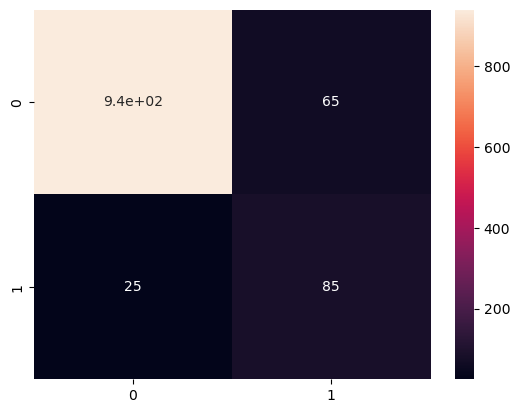

In [41]:
sns.heatmap(confusion_matrix(rf.predict(X_test), y_test),annot=True)
f1_score(tr.predict(X_test), y_test)*100

In [3]:
df.loc[df['Category'] == 'spam' , 'Category' ] = 0 
df.loc[df['Category'] == 'ham' , 'Category' ] = 1

In [4]:
X = df['Message']
y = df['Category']

In [5]:
X_train , X_test , y_train , y_test = train_test_split(X, y ,train_size = 0.2 , shuffle=True , random_state=3) 

In [6]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(1114,)
(4458,)


In [7]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')


X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)
 

y_train = y_train.astype('int')
y_test = y_test.astype('int')


In [8]:
model = LogisticRegression()
model.fit(X_train_features , y_train) 

LogisticRegression()

In [10]:
model_training_prediction = model.predict(X_train_features)
train_accuracy = accuracy_score(  y_train  , model_training_prediction  )
print (str(train_accuracy * 100 ) + ' %')

91.65170556552962 %


In [12]:
model_testing_prediction = model.predict(X_test_features)
test_accuracy = accuracy_score(  y_test , model_testing_prediction  )
print ( str(test_accuracy * 100 ) + ' %')

90.42171377299238 %


In [14]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

input_data_features = feature_extraction.transform(input_mail) 


prediction = model.predict(input_data_features)

if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

Ham mail
